In [97]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io

ModuleNotFoundError: No module named 'skimage'

In [11]:
workers = 0
batch_size = 16
num_epochs = 10
lr = 0.002
beta1 = 0.5
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [12]:
print(device)

cpu


In [70]:
train_dataset = torchvision.datasets.ImageFolder(root='.',
                                                 transform=torchvision.transforms.ToTensor()
                                                )
train_loader = DataLoader(train_dataset,
                  batch_size=batch_size,
                  num_workers=workers,
                  shuffle=False
                 )
 

In [71]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 3642
    Root location: .
    StandardTransform
Transform: ToTensor()

In [72]:
imgs = next(iter(train_loader))

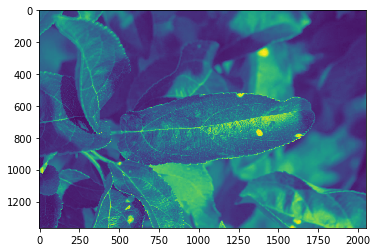

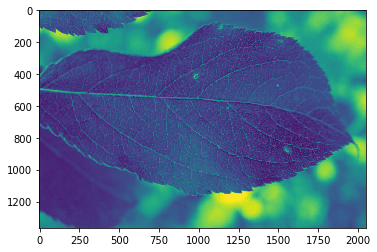

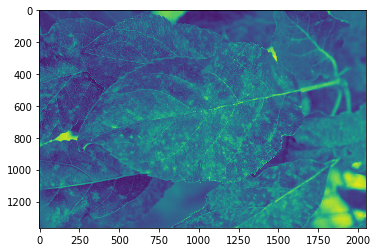

In [76]:
plt.imshow(imgs[0][0][0])
plt.show()
plt.imshow(imgs[0][2][0])
plt.show()
plt.imshow(imgs[0][3][0])
plt.show()

In [77]:
df = pd.read_csv('train.csv')
df

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
5,Train_5,1,0,0,0
6,Train_6,0,1,0,0
7,Train_7,0,0,0,1
8,Train_8,0,0,0,1
9,Train_9,1,0,0,0


In [68]:
class PlantPathologyDataset(Dataset):
    """Plant Pathology dataset."""
    
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with image discription.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.labels = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.image_id[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [93]:
img_name = os.path.join('images/', df.image_id[0])
image = io.imread(img_name)

AttributeError: module 'io' has no attribute 'imread'

In [88]:
if torch.is_tensor(10):
            idx = idx.tolist()

False